In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
import networkx as nx

from scipy import stats

import pybel as pb
import json
import time
import csv

import torch
import pyro

import pyro_cg

pyro.set_rng_seed(101)
torch.set_default_tensor_type(torch.DoubleTensor)
from torch.utils.data import DataLoader

In [5]:
tot_data = pyro_cg.gen_data(10000)

torch.Size([10000, 4])
torch.float64


# Initialize Graph from BEL Statements

In [35]:
str_list = ['temp =| cloudy','cloudy => rainy','temp => icream','rainy =| icream']
type_dict = {}
type_dict['temp'] = 'continuous'
type_dict['cloudy'] = 'continuous'
type_dict['rainy'] = 'continuous'
type_dict['icream'] = 'continuous'


In [40]:
graph_test = pyro_cg.cg_graph(str_list=str_list,type_dict=type_dict,only_creases=False)

The causal graph is a acyclic


# Initialize Graph from json File

In [ ]:
graph_test = pyro_cg.cg_graph(json_file='icream.txt',type_dict=type_dict)

# Initialize Graph from PyBEL graph

In [ ]:
bel_temp = pb.from_bel_script('sag_bel_graph.txt')

In [ ]:
graph_test = pyro_cg.cg_graph(bel_graph=bel_temp)

# Test Various Graph Capabilities

## Write to file that Can be Read by Causal Fusion

In [ ]:
graph_test.write_to_cf('test',100)

## Initialize Graph Probabilities

temp


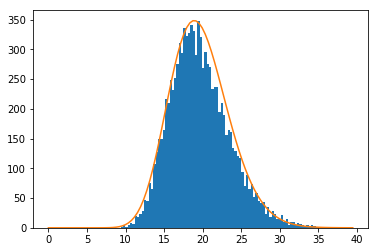

tensor(2.7520)

cloudy
tensor(-0.2751, grad_fn=<NegBackward>)

rainy
tensor(1.0858, grad_fn=<NegBackward>)

icream
tensor(-1.5868, grad_fn=<NegBackward>)

['temp']


In [41]:
graph_test.prob_init(tot_data)
print(graph_test.exog_list)

## Inspect Graph Properties

In [ ]:
for item in graph_test.node_dict:
    print(item)
    print(graph_test.node_dict[item].name)
    print(graph_test.node_dict[item].node_type)
    print()

In [ ]:
for item in graph_test.node_dict:
    print(graph_test.node_dict[item].alpha_j)
    print(graph_test.node_dict[item].alpha_jk)
    print(graph_test.node_dict[item].beta_j)
    print(graph_test.node_dict[item].beta_jk)
    print()

## Sample the Graph under Various Situations

In [ ]:
graph_test.model_sample()

In [ ]:
cond_dict = {}
cond_dict['cloudy'] = torch.Tensor([0.5])

cond_test = graph_test.model_cond_sample(cond_dict)

for item in cond_test:
    print(item)
    print(cond_test[item])
    print()

In [ ]:
do_dict = {}
do_dict['rainy'] = torch.Tensor([2.5])

do_test = graph_test.model_do_sample(do_dict)

for item in do_test:
    print(item)
    print(do_test[item])
    print()



In [ ]:
do_cond_test = graph_test.model_do_cond_sample(do_dict,cond_dict)
for item in do_cond_test:
    print(item)
    print(do_cond_test[item])
    print()

In [ ]:
obs_dict = {}
obs_dict['icream'] = torch.Tensor([0.5])
obs_dict['rainy'] = torch.Tensor([0.8])

do_dict = {}
do_dict['rainy'] = torch.Tensor([1.5])


counter_test = graph_test.model_counterfact(obs_dict,do_dict)
for item in counter_test:
    print(item)
    print(counter_test[item])
    print()


## Do Statistical Tests on Data and Model

In [ ]:
print(graph_test.cond_mut_info(['icream'],['rainy'],['temp'],tot_data))

In [ ]:
a = graph_test.g_test(['icream'],tot_data)
print(a)

## Calculate Various Effect Levels

In [24]:
do_dict1 = {}
do_dict1['cloudy'] = torch.tensor([0.9])
do_dict2 = {}
do_dict2['cloudy'] = torch.tensor([0.1])

target = ['icream']

print(graph_test.tot_effect(target,do_dict1,do_dict2,10000))

{'icream': -0.14961807142301964}


In [25]:
do_dict3 = {}
do_dict3['rainy'] = torch.tensor([2.5])
do_dict4 = {}
do_dict4['rainy'] = torch.tensor([0.5])

med_dict = {}
med_dict['temp'] = torch.tensor([25.0])

print(graph_test.cd_effect(target,do_dict3,do_dict4,med_dict,10000))

{'icream': -0.009109595848395088}


In [32]:
print(graph_test.nd_effect(target,do_dict1,do_dict2,10000))

{'icream': -0.141565255393042}


In [42]:
print(graph_test.ni_effect(target,do_dict1,do_dict2,10000))

{'icream': -0.08084563648935778}
